In [1]:
# Disable all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [3]:
data =pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.drop('Name', axis = 1, inplace = True)
data


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(16719, 15)

In [6]:
data.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16714     True
16715    False
16716     True
16717    False
16718    False
Length: 16719, dtype: bool

In [8]:
data.duplicated().sum()


201

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
# Checking for missing values
data.isnull().sum()

Platform              0
Year_of_Release     268
Genre                 2
Publisher            51
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8381
Critic_Count       8381
User_Score         6508
User_Count         8928
Developer          6427
Rating             6573
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16518 entries, 0 to 16718
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16518 non-null  object 
 1   Year_of_Release  16250 non-null  float64
 2   Genre            16516 non-null  object 
 3   Publisher        16467 non-null  object 
 4   NA_Sales         16518 non-null  float64
 5   EU_Sales         16518 non-null  float64
 6   JP_Sales         16518 non-null  float64
 7   Other_Sales      16518 non-null  float64
 8   Global_Sales     16518 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  Critic_Count     8137 non-null   float64
 11  User_Score       10010 non-null  object 
 12  User_Count       7590 non-null   float64
 13  Developer        10091 non-null  object 
 14  Rating           9945 non-null   object 
dtypes: float64(9), object(6)
memory usage: 2.0+ MB


In [13]:
data.dtypes

Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [14]:
data.nunique()

Platform             31
Year_of_Release      39
Genre                12
Publisher           581
NA_Sales            402
EU_Sales            307
JP_Sales            244
Other_Sales         155
Global_Sales        629
Critic_Score         82
Critic_Count        106
User_Score           96
User_Count          888
Developer          1696
Rating                8
dtype: int64

# Data Visualization

In [15]:
df =data.copy()

In [16]:
correlation= data.corr()
correlation

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.090570,0.006196,-0.168034,0.039947,-0.074291,0.011411,0.223407,0.175339
NA_Sales,-0.090570,1.000000,0.765087,0.449376,0.638327,0.940942,0.240755,0.295413,0.246429
EU_Sales,0.006196,0.765087,1.000000,0.434841,0.722564,0.901141,0.220752,0.277533,0.283360
JP_Sales,-0.168034,0.449376,0.434841,1.000000,0.290788,0.612182,0.152593,0.180219,0.075638
Other_Sales,0.039947,0.638327,0.722564,0.290788,1.000000,0.749023,0.198554,0.251639,0.238982
Global_Sales,-0.074291,0.940942,0.901141,0.612182,0.749023,1.000000,0.245471,0.303571,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


<AxesSubplot:>

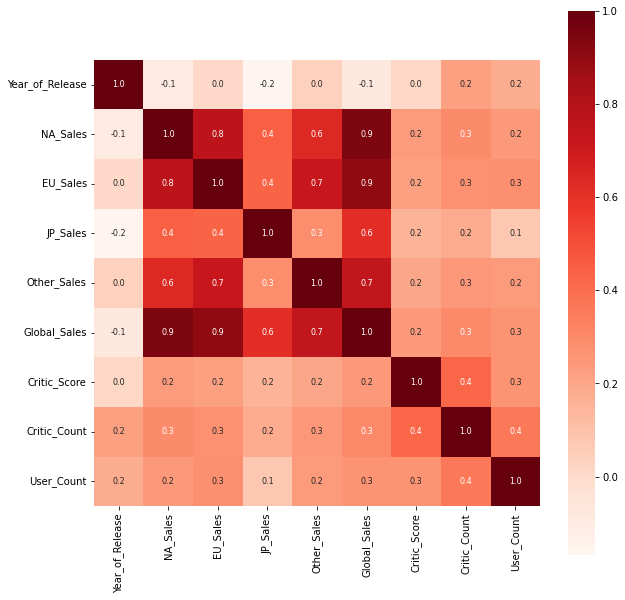

In [17]:
plt.figure(figsize =(10,10))
sns.heatmap(correlation ,cbar=True ,square =True ,fmt ='.1f' ,annot=True ,annot_kws ={'size':8} ,cmap='Reds')

# spliting 

In [18]:
train_data =data.dropna(subset=['Rating'])
train_data 

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,4.0,tbd,NaN,Taito Corporation,E
16702,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,10.0,tbd,NaN,Interchannel-Holon,E
16706,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+
16708,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,NaN,NaN,tbd,NaN,Big John Games,E


In [19]:

test_data = data[data['Rating'].isna()]
test_data

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16713,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
test_data = test_data.drop('Rating', axis=1)
test_data

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
5,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN
9,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN
10,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16713,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [21]:
dataa = train_data.drop(['Rating'],axis=1)
dataa

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,4.0,tbd,NaN,Taito Corporation
16702,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,10.0,tbd,NaN,Interchannel-Holon
16706,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin
16708,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,NaN,NaN,tbd,NaN,Big John Games


In [22]:
y_dataa = train_data['Rating']
y_dataa

0           E
2           E
3           E
6           E
7           E
         ... 
16701       E
16702       E
16706    E10+
16708       E
16710       T
Name: Rating, Length: 9945, dtype: object

In [23]:
y_dataa = pd.DataFrame(y_dataa)
y_dataa
     

,Rating
0,E
2,E
3,E
6,E
7,E
...,...
16701,E
16702,E
16706,E10+
16708,E


# Preprocessing Label Encoding


In [24]:
le = preprocessing.LabelEncoder()
lee = preprocessing.LabelEncoder()


In [25]:
categorical_data = dataa[['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'User_Score', 'Developer']]
categorical_data

,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
0,Wii,2006.0,Sports,Nintendo,8,Nintendo
2,Wii,2008.0,Racing,Nintendo,8.3,Nintendo
3,Wii,2009.0,Sports,Nintendo,8,Nintendo
6,DS,2006.0,Platform,Nintendo,8.5,Nintendo
7,Wii,2006.0,Misc,Nintendo,6.6,Nintendo
...,...,...,...,...,...,...
16701,GC,2003.0,Puzzle,Ubisoft,tbd,Taito Corporation
16702,DS,2008.0,Puzzle,Majesco Entertainment,tbd,Interchannel-Holon
16706,PC,2011.0,Strategy,Unknown,7.2,SimBin
16708,DS,2008.0,Simulation,Destineer,tbd,Big John Games


In [26]:
numeric_data = dataa.drop(categorical_data, axis=1)
numeric_data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0
2,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0
3,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0
6,11.28,9.14,6.50,2.88,29.80,89.0,65.0,431.0
7,13.96,9.18,2.93,2.84,28.92,58.0,41.0,129.0
...,...,...,...,...,...,...,...,...
16701,0.01,0.00,0.00,0.00,0.01,53.0,4.0,NaN
16702,0.01,0.00,0.00,0.00,0.01,48.0,10.0,NaN
16706,0.00,0.01,0.00,0.00,0.01,60.0,12.0,13.0
16708,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


In [27]:
#  compute and apply the transformation 
# Create an instance of categorical_data with apply fit_transform.
label_encoder=categorical_data.apply(le.fit_transform)
label_encoder

,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
0,12,14,10,204,77,1006
2,12,16,6,204,80,1006
3,12,17,10,204,77,1006
6,2,14,4,204,82,1006
7,12,14,3,204,63,1006
...,...,...,...,...,...,...
16701,4,11,5,299,95,1413
16702,2,16,5,168,95,727
16706,5,19,11,302,69,1297
16708,2,16,9,64,95,182


In [28]:
#  new data frame that includes numerical_data and label_encoder.
train_data_label_encoded = pd.concat([numeric_data, label_encoder], axis=1)
train_data_label_encoded

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0,12,14,10,204,77,1006
2,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0,12,16,6,204,80,1006
3,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0,12,17,10,204,77,1006
6,11.28,9.14,6.50,2.88,29.80,89.0,65.0,431.0,2,14,4,204,82,1006
7,13.96,9.18,2.93,2.84,28.92,58.0,41.0,129.0,12,14,3,204,63,1006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,0.01,0.00,0.00,0.00,0.01,53.0,4.0,NaN,4,11,5,299,95,1413
16702,0.01,0.00,0.00,0.00,0.01,48.0,10.0,NaN,2,16,5,168,95,727
16706,0.00,0.01,0.00,0.00,0.01,60.0,12.0,13.0,5,19,11,302,69,1297
16708,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,2,16,9,64,95,182


In [29]:
y_train = y_dataa.apply(lee.fit_transform)
y_train

,Rating
0,1
2,1
3,1
6,1
7,1
...,...
16701,1
16702,1
16706,2
16708,1


In [30]:
#For Test Data
categorical_testdata = test_data[['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'User_Score', 'Developer']]
categorical_testdata

,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
1,NES,1985.0,Platform,Nintendo,NaN,NaN
4,GB,1996.0,Role-Playing,Nintendo,NaN,NaN
5,GB,1989.0,Puzzle,Nintendo,NaN,NaN
9,NES,1984.0,Shooter,Nintendo,NaN,NaN
10,DS,2005.0,Simulation,Nintendo,NaN,NaN
...,...,...,...,...,...,...
16712,GBA,2002.0,Platform,Kemco,NaN,NaN
16713,PS2,2008.0,Racing,Activision,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,NaN,NaN


In [31]:
numeric_testdata = test_data.drop(categorical_testdata, axis=1)
numeric_testdata

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
1,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
4,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN
5,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN
9,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN
10,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16712,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN
16713,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN
16715,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16717,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


In [32]:
# Create an instance of categorical_data with apply fit_transform.
testlabel_encoder=categorical_testdata.apply(le.fit_transform)
testlabel_encoder
     

,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
1,11,5,4,296,42,106
4,5,16,7,296,42,106
5,5,9,5,296,42,106
9,11,4,8,296,42,106
10,4,25,9,296,42,106
...,...,...,...,...,...,...
16712,6,22,4,227,42,106
16713,16,28,6,20,42,106
16715,28,26,10,84,42,106
16717,6,23,4,448,42,106


In [33]:
# we Here we have created a new data frame that includes numeric_testdata and testlabel_encoder.
test_data_label_encoded = pd.concat([numeric_testdata, testlabel_encoder], axis=1)
test_data_label_encoded
     

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Platform,Year_of_Release,Genre,Publisher,User_Score,Developer
1,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,11,5,4,296,42,106
4,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,5,16,7,296,42,106
5,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,5,9,5,296,42,106
9,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,11,4,8,296,42,106
10,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,4,25,9,296,42,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,6,22,4,227,42,106
16713,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,16,28,6,20,42,106
16715,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,28,26,10,84,42,106
16717,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,6,23,4,448,42,106


# Missing Data

In [34]:
imputer = SimpleImputer(missing_values = np.nan ,strategy = 'mean' )

In [35]:
#train
z = imputer.fit_transform(train_data_label_encoded) #X.values returns np array of the value of X data frame, z's type is np array
z

array([[4.136e+01, 2.896e+01, 3.770e+00, ..., 2.040e+02, 7.700e+01,
        1.006e+03],
       [1.568e+01, 1.276e+01, 3.790e+00, ..., 2.040e+02, 8.000e+01,
        1.006e+03],
       [1.561e+01, 1.093e+01, 3.280e+00, ..., 2.040e+02, 7.700e+01,
        1.006e+03],
       ...,
       [0.000e+00, 1.000e-02, 0.000e+00, ..., 3.020e+02, 6.900e+01,
        1.297e+03],
       [1.000e-02, 0.000e+00, 0.000e+00, ..., 6.400e+01, 9.500e+01,
        1.820e+02],
       [1.000e-02, 0.000e+00, 0.000e+00, ..., 1.320e+02, 9.500e+01,
        1.200e+02]])

In [36]:
#test data
z_test = imputer.transform(test_data_label_encoded)
z_test

array([[2.908e+01, 3.580e+00, 6.810e+00, ..., 2.960e+02, 4.200e+01,
        1.060e+02],
       [1.127e+01, 8.890e+00, 1.022e+01, ..., 2.960e+02, 4.200e+01,
        1.060e+02],
       [2.320e+01, 2.260e+00, 4.220e+00, ..., 2.960e+02, 4.200e+01,
        1.060e+02],
       ...,
       [0.000e+00, 1.000e-02, 0.000e+00, ..., 8.400e+01, 4.200e+01,
        1.060e+02],
       [1.000e-02, 0.000e+00, 0.000e+00, ..., 4.480e+02, 4.200e+01,
        1.060e+02],
       [0.000e+00, 0.000e+00, 1.000e-02, ..., 4.120e+02, 4.200e+01,
        1.060e+02]])

# scale

In [37]:
scaler = MinMaxScaler()


In [38]:
x_train = scaler.fit_transform(z)
x_train

array([[1.00000000e+00, 1.00000000e+00, 5.80000000e-01, ...,
        6.14457831e-01, 8.02083333e-01, 6.02756141e-01],
       [3.79110251e-01, 4.40607735e-01, 5.83076923e-01, ...,
        6.14457831e-01, 8.33333333e-01, 6.02756141e-01],
       [3.77417795e-01, 3.77417127e-01, 5.04615385e-01, ...,
        6.14457831e-01, 8.02083333e-01, 6.02756141e-01],
       ...,
       [0.00000000e+00, 3.45303867e-04, 0.00000000e+00, ...,
        9.09638554e-01, 7.18750000e-01, 7.77112043e-01],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.92771084e-01, 9.89583333e-01, 1.09047334e-01],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        3.97590361e-01, 9.89583333e-01, 7.18993409e-02]])

In [39]:

x_test = scaler.transform(z_test)
x_test

array([[7.03094778e-01, 1.23618785e-01, 1.04769231e+00, ...,
        8.91566265e-01, 4.37500000e-01, 6.35110845e-02],
       [2.72485493e-01, 3.06975138e-01, 1.57230769e+00, ...,
        8.91566265e-01, 4.37500000e-01, 6.35110845e-02],
       [5.60928433e-01, 7.80386740e-02, 6.49230769e-01, ...,
        8.91566265e-01, 4.37500000e-01, 6.35110845e-02],
       ...,
       [0.00000000e+00, 3.45303867e-04, 0.00000000e+00, ...,
        2.53012048e-01, 4.37500000e-01, 6.35110845e-02],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.34939759e+00, 4.37500000e-01, 6.35110845e-02],
       [0.00000000e+00, 0.00000000e+00, 1.53846154e-03, ...,
        1.24096386e+00, 4.37500000e-01, 6.35110845e-02]])



x_test = scaler.transform(z_test)
x_test
     

# LogisticRegression

In [40]:
model_logistic = LogisticRegression(random_state=1)

In [41]:
model_logistic.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [42]:
predictions_logistic = model_logistic.predict(x_test)

In [43]:

predictions_logistic


array([1, 1, 1, ..., 5, 1, 2])

# Naive Bayes

In [44]:
model_nb = GaussianNB()
     

In [45]:
model_nb.fit(x_train, y_train)
     


GaussianNB()

In [46]:
predicted_nb = model_nb.predict(x_test)

In [47]:
predicted_nb

array([1, 1, 1, ..., 2, 3, 7])